<a href="https://colab.research.google.com/github/Team7-Sept2021/test/blob/main/ML_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, OrdinalEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error


from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier


from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
np.set_printoptions(precision=3)

%matplotlib inline
np.set_printoptions(precision=3, suppress=True)
pd.set_option('precision', 3)


In [187]:
df = pd.read_excel("mpg.data.xlsx")
df = df.dropna(axis=1, thresh= 200)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displayments  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


# Preprocessing

Missing Values

In [188]:
df_re_missing = df.dropna(axis = 0,subset=['mpg'])
median_value = df_re_missing['horsepower'].median()
df_re_missing['horsepower'] =df_re_missing['horsepower'].fillna(median_value)
df_prepro = df_re_missing.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [189]:
df_prepro['car_company'] = df_prepro['car name'].apply(lambda x: x.split()[0])

df_prepro.replace({'vokswagen': 'volkswagen',
            'vw': 'volkswagen', 
            'maxda': 'mazda', 
            'toyouta': 'toyota',
            'mercedes-benz': 'mercedes',
            'chevy': 'chevrolet',
            'chevroelt': 'chevrolet',
            'capri': 'ford'}, inplace=True)

df_prepro = df_prepro.drop(columns='car name')

In [190]:
dict_region = {1:'USA',2:'Europe',3:'Japan'}
df_prepro['origin'] = df_prepro['origin'].replace(dict_region)

In [191]:
df_prepro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displayments  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car_company   398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 31.1+ KB


In [224]:
#X =  df_prepro.drop(columns='mpg')
y =  df_prepro['mpg']
X = df_prepro.iloc[:,[1,2,3,4,5,6,7]]

In [225]:
seed = 42  # random seed for reproducability

# it handles both shuffling and splitting
# x_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=seed)

In [226]:
X_train.head()

,cylinders,displayments,horsepower,weight,acceleration,model year,origin
3,8,304.0,150.0,3433,12.0,70,USA
24,4,97.0,88.0,2130,14.5,70,Japan
384,4,91.0,68.0,2025,18.2,82,Japan
255,4,91.0,60.0,1800,16.4,78,Japan
184,4,115.0,95.0,2694,15.0,75,Europe


## If we keep 'origin' or 'car_company'

In [227]:
#OneHotEncoder  https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki
X_train = X_train.reset_index()
encoder = OneHotEncoder( handle_unknown="ignore")
enc = pd.DataFrame(encoder.fit_transform(X_train[['origin']]).toarray())
X_train = X_train.join(enc)
X_train.set_index('index', inplace=True)
#drop 'car_company','origin'
X_train = X_train.drop(columns=['origin'])


In [228]:
X_test = X_test.reset_index()
enc = pd.DataFrame(encoder.transform(X_test[['origin']]).toarray())
X_test = X_test.join(enc)
X_test.set_index('index', inplace=True)
#drop 'car_company','origin'
X_test = X_test.drop(columns=['origin'])

In [229]:
#StandardScaler  https://www.geeksforgeeks.org/normalization-vs-standardization/
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# PCA

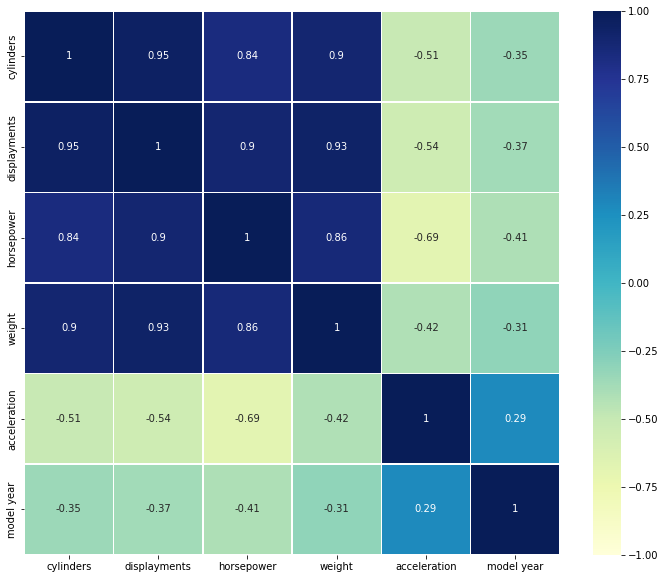

In [230]:
from sklearn.decomposition import PCA #https://towardsdatascience.com/how-to-remove-multicollinearity-in-dataset-using-pca-4b4561c28d0b

corr = X.corr()
plt.figure(figsize = (12,10))

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)

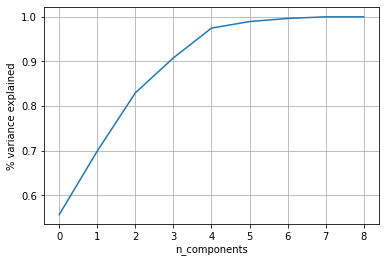

In [231]:
pca = PCA(n_components = X_train.shape[1])
pca_data = pca.fit_transform(X_train)

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

plt.plot(cumm_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("% variance explained")
plt.show()

In [232]:
cumm_var_explained #28

array([0.557, 0.7  , 0.83 , 0.908, 0.975, 0.989, 0.996, 1.   , 1.   ])

In [233]:
pca.explained_variance_

array([5.029, 1.287, 1.175, 0.708, 0.602, 0.132, 0.063, 0.033, 0.   ])

In [221]:
pca = PCA(n_components=29)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

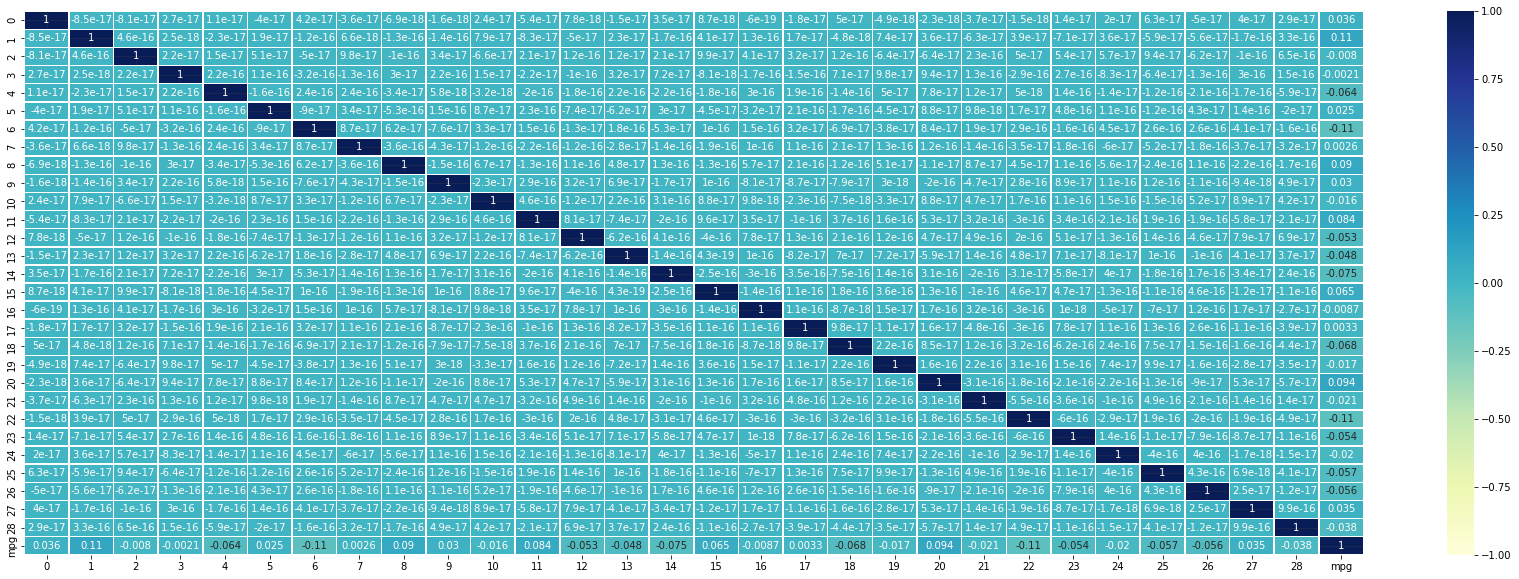

In [222]:
df_train_pca = pd.DataFrame(X_train)
df_train_pca["mpg"] = y_train

corr = df_train_pca.corr()
plt.figure(figsize = (30,10))

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()

# ML process

In [195]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

In [234]:
lassoReg = linear_model.Lasso()
linear = LinearRegression()
knr = KNeighborsRegressor()
regr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
model = [lassoReg, linear, knr, regr, svr, rfr]
for i in model:
  i.fit(X_train, y_train)

  pred_test = i.predict(X_test)
  print(i)
  print(f'Mean Squared Error: {mean_squared_error(y_test, pred_test)}')  
  print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred_test))}')
  print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred_test)}')
  print(f'R2:{r2_score(y_test,pred_test)}')
  print(f'Score: {i.score(X_test, y_test)}\n\n')

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Mean Squared Error: 8.654283683061303
Root Mean Squared Error: 2.9418163917996827
Mean Absolute Error: 2.2515865750073827
R2:0.8390393137529892
Score: 0.8390393137529892


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean Squared Error: 8.338657478621617
Root Mean Squared Error: 2.8876733677169266
Mean Absolute Error: 2.2881587267140917
R2:0.8449096332762084
Score: 0.8449096332762084


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
Mean Squared Error: 5.1816699999999996
Root Mean Squared Error: 2.2763281837204405
Mean Absolute Error: 1.8475000000000001
R2:0.9036263208313828
Score: 0.9036263208313828


DecisionTreeRegressor(

# KNeighborsRegressor - Grid

In [243]:
param_knr_grid = {'n_neighbors': np.arange(1,40, 2),
                  'algorithm':[ 'ball_tree', 'kd_tree', 'brute'],
                'weights': ['uniform', 'distance'],
                'leaf_size':np.arange(1, 100, 10),
                'p':np.arange(1, 4, 1)}


knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, param_knr_grid, cv=KFold(n_splits=5,
                                              shuffle=True, random_state=0))    #Να κοιτάξω για scoring='neg_mean_squared_error' κτλ
gknr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]),
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39]),
                         'p': array([1, 2, 3]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [244]:
pred_test = gknr.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, pred_test)}')  
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred_test))}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred_test)}')
print(f'Score: {gknr.score(X_test, y_test)}')
print(f'R2:{r2_score(y_test,pred_test)}')

Mean Squared Error: 4.618175587695811
Root Mean Squared Error: 2.1489940874036417
Mean Absolute Error: 1.7053030488475958
Score: 0.9141067315300018
R2:0.9141067315300018


In [245]:
print(gknr.best_estimator_)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=1, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                    weights='distance')


# RandomForestRegressor - Grid

In [200]:
param_rfr_grid = {'n_estimators': np.arange(10, 100, 20),
              'max_depth':np.arange(10, 110, 10),
              'max_features' : ['auto', 'sqrt'],
              'min_samples_split' : [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'bootstrap' : [True, False]}


rfr = RandomForestRegressor()
grfr = GridSearchCV(rfr, param_rfr_grid, cv=KFold(n_splits=5,
                                              shuffle=True, random_state=0))   
grfr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_est...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'bootstrap

In [201]:
pred_test = grfr.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, pred_test)}')  
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred_test))}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred_test)}')
print(f'Score: {grfr.score(X_test, y_test)}')
print(f'R2:{r2_score(y_test,pred_test)}')

Mean Squared Error: 5.941800979427621
Root Mean Squared Error: 2.43758096879419
Mean Absolute Error: 1.7588677502960095
Score: 0.8894886742546066
R2:0.8894886742546066


In [202]:
print(grfr.best_estimator_)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


# Lasso Regression

In [238]:
param_lassoReg_grid = {'alpha':np.arange(0.1, 1, 0.0001),
                       'warm_start': [True, False],
                       'max_iter':[1000,5000]}  #selection':['cyclic', 'random']}


lassoReg = linear_model.Lasso()
glassoReg = GridSearchCV(lassoReg, param_lassoReg_grid, cv=KFold(n_splits=10,
                                              shuffle=True, random_state=0))
glassoReg.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.1, 0.1, 0.1, ..., 1. , 1. , 1. ]),
                         'max_iter': [1000, 10000],
                         'warm_start': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [241]:
pred_test = glassoReg.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, pred_test)}')  
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred_test))}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred_test)}')
print(f'Score: {glassoReg.score(X_test, y_test)}')
print(f'R2:{r2_score(y_test,pred_test)}')

Mean Squared Error: 8.355050725258167
Root Mean Squared Error: 2.8905104610186356
Mean Absolute Error: 2.276486827789154
Score: 0.8446047359184293
R2:0.8446047359184293


In [242]:
print(glassoReg.best_estimator_)

Lasso(alpha=0.20610000000000306, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=True)


# Pipe